# Phase II of INFO2950 Project
### by Aida Sarinzhipova (as3764) and Kyuman Kim (kk946)

**Possible Research Questions**
1. Which genre is most influential in affects the other variables (view counts, revenue, rating)
2. Which genre got popular overtime?
3. How has the popularity of a movie genre affected the rise and fall of other genres?
4. How does the genre of a movie influence its success?


## Data Cleaning
In the cells below, we organized data from 'The Movie Database' (TMDB) and 'the Internet Movie Database' (IMDb) retrieved from Kaggle.

In [1]:
# to load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# load data
raw_movie_data = pd.read_csv("tmdb_5000_movies.csv")
raw_cast_data = pd.read_csv("tmdb_5000_credits.csv")

In [2]:
raw_movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
raw_movie_data['genres'][2]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'

In [4]:
# restructuring the column order in one dataset and only keeping the columns we need
raw_movie_data = raw_movie_data[['id', 'original_title', 'runtime', 'genres', 'production_companies', 'release_date', 'popularity', 'vote_average', 'vote_count']]

In [5]:
# changing a column name in the raw cast dataset to have one same column within two datasets for merging
raw_cast_data = raw_cast_data.rename(columns={'movie_id':'id'})

In [6]:
raw_cast_data.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
#merging the two datasets based on the movie "id"
combined_data = raw_movie_data.merge(raw_cast_data, how = 'outer')
combined_data.head()

,id,original_title,runtime,genres,production_companies,release_date,popularity,vote_average,vote_count,title,cast,crew
0,19995,Avatar,162.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,150.437577,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,169.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,148.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,107.376788,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,165.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,112.312950,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,132.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,43.926995,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
# dropping null values to avoid errors in the future
combined_data.dropna(inplace = True)
combined_data['genres'].count()

4800

In [9]:
combined_data['genres'] = combined_data['genres'].map(lambda x: x.lstrip('[{').rstrip('}]'))
combined_data.replace('', None)

,id,original_title,runtime,genres,production_companies,release_date,popularity,vote_average,vote_count,title,cast,crew
0,19995,Avatar,162.0,"""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name""...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,150.437577,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,169.0,"""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,148.0,"""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,107.376788,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,165.0,"""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name""...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,112.312950,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,132.0,"""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,43.926995,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,81.0,"""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name""...","[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,14.269792,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,85.0,"""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""na...",[],2011-12-26,0.642552,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered",120.0,"""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name""...","[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,1.444476,7.0,6,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,98.0,"""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name""...",[],2012-05-03,0.857008,5.7,7,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [36]:
combined_data.loc[4801]

id                                                                 126186
original_title                                           Shanghai Calling
runtime                                                                98
genres                                                                   
production_companies                                                   []
release_date                                                   2012-05-03
popularity                                                       0.857008
vote_average                                                          5.7
vote_count                                                              7
title                                                    Shanghai Calling
cast                    [{"cast_id": 3, "character": "Sam", "credit_id...
crew                    [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
Name: 4801, dtype: object

In [11]:
separated = combined_data["genres"].str.split("},", n = 3, expand = True)

separated

,0,1,2,3
0,"""id"": 28, ""name"": ""Action""","{""id"": 12, ""name"": ""Adventure""","{""id"": 14, ""name"": ""Fantasy""","{""id"": 878, ""name"": ""Science Fiction"""
1,"""id"": 12, ""name"": ""Adventure""","{""id"": 14, ""name"": ""Fantasy""","{""id"": 28, ""name"": ""Action""",None
2,"""id"": 28, ""name"": ""Action""","{""id"": 12, ""name"": ""Adventure""","{""id"": 80, ""name"": ""Crime""",None
3,"""id"": 28, ""name"": ""Action""","{""id"": 80, ""name"": ""Crime""","{""id"": 18, ""name"": ""Drama""","{""id"": 53, ""name"": ""Thriller"""
4,"""id"": 28, ""name"": ""Action""","{""id"": 12, ""name"": ""Adventure""","{""id"": 878, ""name"": ""Science Fiction""",None
...,...,...,...,...
4798,"""id"": 28, ""name"": ""Action""","{""id"": 80, ""name"": ""Crime""","{""id"": 53, ""name"": ""Thriller""",None
4799,"""id"": 35, ""name"": ""Comedy""","{""id"": 10749, ""name"": ""Romance""",None,None
4800,"""id"": 35, ""name"": ""Comedy""","{""id"": 18, ""name"": ""Drama""","{""id"": 10749, ""name"": ""Romance""","{""id"": 10770, ""name"": ""TV Movie"""
4801,,None,None,None


In [12]:
# the "genres" column includes up to 4 genres one movie can belong to, so we want to have 4 columns for genres of each movie
new = combined_data["genres"].str.split(",", n = 7, expand = True)
new.columns = ["1", "genre_1", "2", "genre_2", "3", "genre_3", "4", "genre_4"]
new.head()

,1,genre_1,2,genre_2,3,genre_3,4,genre_4
0,"""id"": 28","""name"": ""Action""}","{""id"": 12","""name"": ""Adventure""}","{""id"": 14","""name"": ""Fantasy""}","{""id"": 878","""name"": ""Science Fiction"""
1,"""id"": 12","""name"": ""Adventure""}","{""id"": 14","""name"": ""Fantasy""}","{""id"": 28","""name"": ""Action""",None,None
2,"""id"": 28","""name"": ""Action""}","{""id"": 12","""name"": ""Adventure""}","{""id"": 80","""name"": ""Crime""",None,None
3,"""id"": 28","""name"": ""Action""}","{""id"": 80","""name"": ""Crime""}","{""id"": 18","""name"": ""Drama""}","{""id"": 53","""name"": ""Thriller"""
4,"""id"": 28","""name"": ""Action""}","{""id"": 12","""name"": ""Adventure""}","{""id"": 878","""name"": ""Science Fiction""",None,None


In [13]:
# cleaning the string values within genres from unnecessary characters
new = new[ [ 'genre_1', 'genre_2', 'genre_3', 'genre_4'] ] 
new["genre_1"] = new["genre_1"].str.replace('name', '').str.lstrip('": "').str.rstrip('"}]')
new["genre_2"] = new["genre_2"].str.replace('name', '').str.lstrip('": "').str.rstrip('"}]')
new["genre_3"] = new["genre_3"].str.replace('name', '').str.lstrip('": "').str.rstrip('"}]')
new["genre_4"] = new["genre_4"].str.replace('name', '').str.lstrip('": "').str.rstrip('"}]')
movie_id = combined_data["id"]
new = new.join(movie_id)
new.head()

,genre_1,genre_2,genre_3,genre_4,id
0,Action,Adventure,Fantasy,Science Fiction,19995
1,Adventure,Fantasy,Action,None,285
2,Action,Adventure,Crime,None,206647
3,Action,Crime,Drama,Thriller,49026
4,Action,Adventure,Science Fiction,None,49529


In [14]:
# merging the new 4 genres columns with the "combined" dataset
result = pd.concat([combined_data, new], axis=1, sort=False)
result.drop("genres", axis=1)
result = result[ ['id', 'original_title', 'runtime', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'production_companies', 'cast', 'crew', 'release_date', 'popularity', 'vote_average', 'vote_count'] ]
result = result.loc[:,~result.columns.duplicated()]
result.head()

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,production_companies,cast,crew,release_date,popularity,vote_average,vote_count
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,6.9,4500
2,206647,Spectre,148.0,Action,Adventure,Crime,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,6.3,4466
3,49026,The Dark Knight Rises,165.0,Action,Crime,Drama,Thriller,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,112.312950,7.6,9106
4,49529,John Carter,132.0,Action,Adventure,Science Fiction,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,43.926995,6.1,2124


In [15]:
# loading another dataset with more than 80K movies that has important info like movies' income
another = pd.read_csv("imdb_movies.csv")
another.head()

/Users/KIM/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [16]:
# checking how many movies from our dataset are also in the big "another "dataset + adding the column with True/False
yes = another['original_title'].isin(result['original_title'])
another['includes_our_movie'] = yes
another.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,includes_our_movie
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,False
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,False
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,False
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,True
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,False


In [17]:
# updating "another" dataset to have only those movies that we have in our "result" dataset
only_needed_another = another.loc[another["includes_our_movie"], :].dropna()
only_needed_another

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,includes_our_movie
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,In a futuristic city sharply divided between t...,8.3,156076,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0,True
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,The Tramp struggles to live in modern industri...,8.5,211250,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0,True
2827,tt0029583,Biancaneve e i sette nani,Snow White and the Seven Dwarfs,1937,1938-11-30,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,Exiled into the dangerous forest by her wicked...,7.6,177157,$ 1499000,$ 184925486,$ 184925486,95.0,260.0,173.0,True
3266,tt0031381,Via col vento,Gone with the Wind,1939,1949-03-12,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,A manipulative woman and a roguish man conduct...,8.1,283975,$ 3977000,$ 200852579,$ 402352579,97.0,881.0,197.0,True
3348,tt0031679,Mr. Smith va a Washington,Mr. Smith Goes to Washington,1939,1947-04-05,"Comedy, Drama",129,USA,English,Frank Capra,...,A naive man is appointed to fill a vacancy in ...,8.1,104547,$ 1900000,$ 144738,$ 144738,73.0,296.0,88.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79742,tt6139732,Aladdin,Aladdin,2019,2019-05-22,"Adventure, Family, Fantasy",128,"UK, USA, Australia","English, Arabic",Guy Ritchie,...,A kind-hearted street urchin and a power-hungr...,7.0,215140,$ 183000000,$ 355559216,$ 1050693953,53.0,2299.0,349.0,True
79820,tt6164502,November,November,2017,2017-02-03,"Drama, Fantasy, Horror",115,Estonia,"Estonian, German, Italian",Rainer Sarnet,...,"In a poor Estonian village, a group of peasant...",7.2,3752,EUR 1450000,$ 19084,$ 19084,79.0,25.0,69.0,True
80644,tt6476140,Serenity - L'isola dell'inganno,Serenity,2019,2019-07-18,"Drama, Mystery, Thriller",106,"UK, USA","English, French",Steven Knight,...,A fishing boat captain juggles facing his myst...,5.4,33464,$ 25000000,$ 8547045,$ 14454622,37.0,581.0,173.0,True
81178,tt6772950,Obbligo o verità,Truth or Dare,2018,2018-06-21,"Horror, Thriller",100,USA,"English, Spanish",Jeff Wadlow,...,A harmless game of Truth or Dare among friends...,5.2,45088,$ 3500000,$ 41411015,$ 95330493,35.0,451.0,210.0,True


In [18]:
cleaned_another = only_needed_another[['original_title', 'country', 'director', 'actors', 'budget', 'usa_gross_income', 'worlwide_gross_income' ]]
cleaned_another.count()

original_title           3608
country                  3608
director                 3608
actors                   3608
budget                   3608
usa_gross_income         3608
worlwide_gross_income    3608
dtype: int64

In [19]:
# merging two datasets based on the movie titles
final = result.merge(cleaned_another,how='inner', on="original_title")
final

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,production_companies,cast,crew,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worlwide_gross_income
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,7.2,11800,USA,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",$ 237000000,$ 760507625,$ 2790439092
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,6.9,4500,USA,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",$ 300000000,$ 309420425,$ 960996492
2,206647,Spectre,148.0,Action,Adventure,Crime,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,6.3,4466,"UK, USA, Austria, Mexico, Italy, Morocco",Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",$ 245000000,$ 200074609,$ 880674609
3,49026,The Dark Knight Rises,165.0,Action,Crime,Drama,Thriller,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,112.312950,7.6,9106,"UK, USA",Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",$ 250000000,$ 448139099,$ 1081133191
4,49529,John Carter,132.0,Action,Adventure,Science Fiction,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,43.926995,6.1,2124,USA,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",$ 250000000,$ 73078100,$ 284139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,24055,The Puffy Chair,85.0,Drama,Comedy,Romance,None,[],"[{""cast_id"": 4, ""character"": ""Josh"", ""credit_i...","[{""credit_id"": ""52fe447fc3a368484e026881"", ""de...",2005-01-17,1.243955,6.2,15,USA,"Jay Duplass, Mark Duplass","Mark Duplass, Katie Aselton, Rhett Wilkins, Ju...",$ 15000,$ 194523,$ 195254
3605,44990,Breaking Upwards,88.0,Comedy,Romance,None,None,[],"[{""cast_id"": 1, ""character"": ""Zoe"", ""credit_id...","[{""credit_id"": ""572239efc3a368712a0007db"", ""de...",2009-03-14,0.674570,5.6,12,USA,Daryl Wein,"Zoe Lister-Jones, Daryl Wein, Julie White, And...",$ 15000,$ 77389,$ 77389
3606,39851,Clean,111.0,Drama,None,None,None,[],"[{""cast_id"": 1, ""character"": ""Emily Wang"", ""cr...","[{""credit_id"": ""52fe47369251416c9106db9b"", ""de...",2004-09-01,1.464566,6.7,17,"France, Canada, UK",Olivier Assayas,"Maggie Cheung, Nick Nolte, Béatrice Dalle, Jea...",GBP 4500,$ 138711,$ 2971219
3607,14337,Primer,77.0,Science Fiction,Drama,Thriller,None,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_...","[{""credit_id"": ""52fe45e79251416c75066791"", ""de...",2004-10-08,23.307949,6.9,658,USA,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A...",$ 7000,$ 424760,$ 545436


In [20]:
# sorting from highest popularity to lowest
final.sort_values(by=["popularity"],ascending=False)

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,production_companies,cast,crew,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worlwide_gross_income
544,211672,Minions,91.0,Family,Animation,Adventure,Comedy,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",2015-06-17,875.581305,6.4,4571,USA,"Kyle Balda, Pierre Coffin","Sandra Bullock, Jon Hamm, Michael Keaton, Alli...",$ 74000000,$ 336045770,$ 1159443129
95,157336,Interstellar,169.0,Adventure,Drama,Science Fiction,None,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",2014-11-05,724.247784,8.1,10867,"USA, UK, Canada",Christopher Nolan,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",$ 165000000,$ 188020017,$ 696742056
775,293660,Deadpool,108.0,Action,Adventure,Comedy,None,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",2016-02-09,514.569956,7.4,10995,USA,Tim Miller,"Ryan Reynolds, Karan Soni, Ed Skrein, Michael ...",$ 58000000,$ 363070709,$ 782612155
94,118340,Guardians of the Galaxy,121.0,Action,Science Fiction,Adventure,None,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",2014-07-30,481.098624,7.9,9742,USA,James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",$ 170000000,$ 333176600,$ 772791156
125,76341,Mad Max: Fury Road,120.0,Action,Adventure,Science Fiction,Thriller,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",2015-05-13,434.278564,7.2,9427,"Australia, South Africa",George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu...",$ 150000000,$ 154058340,$ 375225175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,78705,Cama adentro,83.0,Drama,Foreign,None,None,"[{""name"": ""Libido Cine"", ""id"": 28810}, {""name""...","[{""cast_id"": 1001, ""character"": ""Beba Pujol"", ...","[{""credit_id"": ""52fe49afc3a368484e138b55"", ""de...",2004-09-21,0.038706,7.8,3,"Argentina, Spain",Jorge Gaggero,"Norma Aleandro, Norma Argentina, Marcos Mundst...",$ 800000,$ 200433,$ 618264
3536,64499,Quinceañera,90.0,Drama,None,None,None,[],"[{""cast_id"": 3, ""character"": ""Magdalena"", ""cre...","[{""credit_id"": ""552e417092514174db006c46"", ""de...",2006-06-05,0.034135,7.0,7,USA,"Richard Glatzer, Wash Westmoreland","Jesus Castanos, Araceli Guzman-Rico, Emily Rio...",$ 400000,$ 1692693,$ 2522787
2905,55903,Betty Fisher et autres histoires,103.0,Drama,Thriller,Crime,Foreign,[],"[{""cast_id"": 4, ""character"": ""Betty Fisher"", ""...","[{""credit_id"": ""58ade9aec3a36861d6000653"", ""de...",2001-09-01,0.024186,7.0,3,"France, Canada",Claude Miller,"Sandrine Kiberlain, Nicole Garcia, Mathilde Se...",FRF 50000000,$ 208400,$ 676239
3608,67238,Cavite,80.0,Foreign,Thriller,None,None,[],[],"[{""credit_id"": ""52fe475dc3a368484e0c319f"", ""de...",2005-03-12,0.022173,7.5,2,"Philippines, USA","Neill Dela Llana, Ian Gamazon","Ian Gamazon, Edwin Lagda, Edgar Tancangco, Nor...",$ 7000,$ 70071,$ 70071


In [21]:
# there is a mistake in the column named "worlwide_gross_income" and it needs a letter "d" in the word worldwide
final = final.rename(columns = {"worlwide_gross_income": "worldwide_gross_income"})

In [22]:
# creating a function that will remove the currency symbol from the 2 columns with gross income values to make sure these values are the float type
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [23]:
final['usa_gross_income'] = final['usa_gross_income'].apply(clean_currency)

In [24]:
final['worldwide_gross_income'] = final['worldwide_gross_income'].apply(clean_currency)

In [25]:
final['release_date'] = pd.to_datetime(final['release_date'])

In [26]:
final

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,production_companies,cast,crew,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worldwide_gross_income
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,7.2,11800,USA,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",$ 237000000,760507625,2790439092
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,6.9,4500,USA,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",$ 300000000,309420425,960996492
2,206647,Spectre,148.0,Action,Adventure,Crime,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,6.3,4466,"UK, USA, Austria, Mexico, Italy, Morocco",Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",$ 245000000,200074609,880674609
3,49026,The Dark Knight Rises,165.0,Action,Crime,Drama,Thriller,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,112.312950,7.6,9106,"UK, USA",Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",$ 250000000,448139099,1081133191
4,49529,John Carter,132.0,Action,Adventure,Science Fiction,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,43.926995,6.1,2124,USA,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",$ 250000000,73078100,284139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,24055,The Puffy Chair,85.0,Drama,Comedy,Romance,None,[],"[{""cast_id"": 4, ""character"": ""Josh"", ""credit_i...","[{""credit_id"": ""52fe447fc3a368484e026881"", ""de...",2005-01-17,1.243955,6.2,15,USA,"Jay Duplass, Mark Duplass","Mark Duplass, Katie Aselton, Rhett Wilkins, Ju...",$ 15000,194523,195254
3605,44990,Breaking Upwards,88.0,Comedy,Romance,None,None,[],"[{""cast_id"": 1, ""character"": ""Zoe"", ""credit_id...","[{""credit_id"": ""572239efc3a368712a0007db"", ""de...",2009-03-14,0.674570,5.6,12,USA,Daryl Wein,"Zoe Lister-Jones, Daryl Wein, Julie White, And...",$ 15000,77389,77389
3606,39851,Clean,111.0,Drama,None,None,None,[],"[{""cast_id"": 1, ""character"": ""Emily Wang"", ""cr...","[{""credit_id"": ""52fe47369251416c9106db9b"", ""de...",2004-09-01,1.464566,6.7,17,"France, Canada, UK",Olivier Assayas,"Maggie Cheung, Nick Nolte, Béatrice Dalle, Jea...",GBP 4500,138711,2971219
3607,14337,Primer,77.0,Science Fiction,Drama,Thriller,None,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_...","[{""credit_id"": ""52fe45e79251416c75066791"", ""de...",2004-10-08,23.307949,6.9,658,USA,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A...",$ 7000,424760,545436


In [27]:
# movie budgets are displayed in different currencies
# check how many movies out of 3608 have their budget in dollars
final["budget"].str.contains('$', regex=False).sum()

3497

In [28]:
#find all unique currencies besides USD for future conversion
currency=final[~final["budget"].str.contains('$', regex=False)]
currency["budget"] = currency["budget"].str.replace('\d+', '')
currency["budget"].unique()

<ipython-input-28-8cef779a4f67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency["budget"] = currency["budget"].str.replace('\d+', '')


array(['EUR ', 'GBP ', 'CNY ', 'CAD ', 'DEM ', 'THB ', 'FRF ', 'AUD ',
       'HUF ', 'INR ', 'DKK ', 'NOK ', 'BRL '], dtype=object)

In [29]:
# creating new function to convert the movie budgets into USD
def convert_rates(money):
    if 'EUR' in money:
        return int(''.join(x for x in money if x.isdigit())) * 1.17
    elif 'GBP' in money:
        return int(''.join(x for x in money if x.isdigit())) * 1.29
    elif 'CNY' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.15
    elif 'CAD' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.75
    elif 'DEM' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.6
    elif 'THB' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.032
    elif 'FRF' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.18
    elif 'AUD' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.71
    elif 'HUF' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.0033
    elif 'INR' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.014
    elif 'DKK' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.16
    elif 'NOK' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.11
    elif 'BRL' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.18
    else:
        return int(''.join(x for x in money if x.isdigit()))

In [30]:
# converting the movies' budgets into dollars where needed
final["budget"] = final["budget"].apply(convert_rates)

In [31]:
# our outcome of the data cleaning we performed so far
# the dataset we will use for summary statistics
final.head()

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,production_companies,cast,crew,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worldwide_gross_income
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,7.2,11800,USA,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",237000000.0,760507625,2790439092
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,6.9,4500,USA,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",300000000.0,309420425,960996492
2,206647,Spectre,148.0,Action,Adventure,Crime,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,6.3,4466,"UK, USA, Austria, Mexico, Italy, Morocco",Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",245000000.0,200074609,880674609
3,49026,The Dark Knight Rises,165.0,Action,Crime,Drama,Thriller,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,112.312950,7.6,9106,"UK, USA",Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",250000000.0,448139099,1081133191
4,49529,John Carter,132.0,Action,Adventure,Science Fiction,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,43.926995,6.1,2124,USA,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",250000000.0,73078100,284139100


In [32]:
genre1_df = final.loc[:, ~final.columns.isin(['genre_2', 'genre_3', 'genre_4'])]
genre2_df = final.loc[:, ~final.columns.isin(['genre_1', 'genre_3', 'genre_4'])]
genre3_df = final.loc[:, ~final.columns.isin(['genre_1', 'genre_2', 'genre_4'])]
genre4_df = final.loc[:, ~final.columns.isin(['genre_1', 'genre_2', 'genre_3'])]

genre1_df = genre1_df.rename(columns={"genre_1": "genre"})
genre2_df = genre2_df.rename(columns={"genre_2": "genre"})
genre3_df = genre3_df.rename(columns={"genre_3": "genre"})
genre4_df = genre4_df.rename(columns={"genre_4": "genre"})

genre2_df = genre2_df[genre2_df['genre'] != 'None']
genre3_df = genre3_df[genre3_df['genre'] != 'None']
genre4_df = genre4_df[genre4_df['genre'] != 'None']

frames = [genre1_df, genre2_df, genre3_df, genre4_df]
genre_df = pd.concat(frames)

genre_df = genre_df.sort_values(['genre'])
# genre_df.sort_values(by=['genre'])


# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(genre_df['genre'])

genre_table = genre_df.groupby('genre').count()
genre_table.head()

,id,original_title,runtime,production_companies,cast,crew,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worldwide_gross_income
genre,,,,,,,,,,,,,,,,
Action,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912
"Action""}, {""id"": 10749, """": ""Romance",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Action""}, {""id"": 35, """": ""Comedy",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
"Action""}, {""id"": 36, """": ""History",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Action""}, {""id"": 53, """": ""Thriller",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


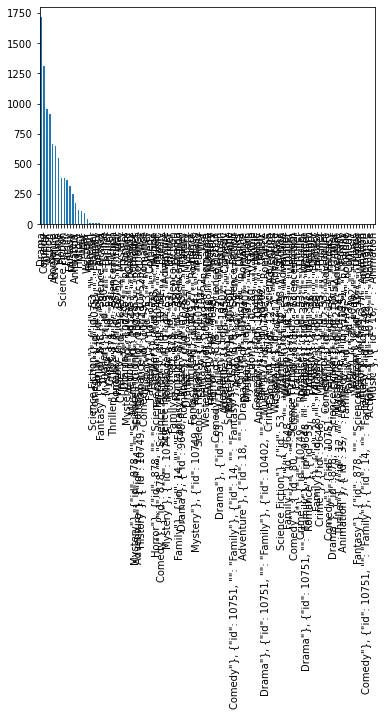

In [33]:
genre_df['genre'].value_counts().plot(kind='bar')

In [34]:
mean_by_genre = genre_df.groupby('genre').mean()
mean_by_genre.head()

,id,runtime,popularity,vote_average,vote_count,budget
genre,,,,,,
Action,42164.230263,111.797149,37.208298,6.082895,1393.655702,6.218259e+07
"Action""}, {""id"": 10749, """": ""Romance",10705.000000,137.000000,4.641006,7.400000,71.000000,9.000000e+06
"Action""}, {""id"": 35, """": ""Comedy",68415.333333,97.666667,79.447378,6.233333,2291.000000,9.066667e+07
"Action""}, {""id"": 36, """": ""History",205775.000000,122.000000,50.767332,6.500000,1276.000000,1.000000e+08
"Action""}, {""id"": 53, """": ""Thriller",11495.000000,114.000000,11.379652,5.900000,173.000000,1.500000e+07


In [35]:
genre_timestamp = genre_df.loc[:, genre_df.columns.isin(['genre', 'release_date'])]
genre_timestamp.head()

,genre,release_date
0,Action,2009-12-10
82,Action,2014-05-28
1463,Action,1990-03-02
97,Action,2012-11-26
1459,Action,1994-06-09


## Questions for reviewers
- How would you distribute the significance of each genre for movies with multiple genres?
